# Deep learning specialisation One week 1 : CNN

In [3]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt
from public_test import * 

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [4]:
# function adds padding to input 
def zero_pad(X, pad):
    # X.shape = (m, n_h, n_W, n_c) 
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)), mode='constant', constant_values=(0,0))
    return X_pad

x.shape
 (4, 3, 3, 2)
x_pad.shape
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1]
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


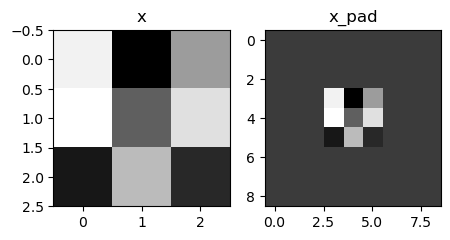

In [9]:
# check if zero_pad works
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x, 3)
print("x.shape\n",x.shape)
print("x_pad.shape\n", x_pad.shape)
print("x[1,1] =\n", x[1,1])
print("x_pad[1,1]\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [10]:
# Convolution with 1 Stride
def conv_single_step(a_slice_prev, W, b):
    # Arguments:
    # a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    # W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    # b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    # Elemnt wise price of a_prev and Weights
    s = a_slice_prev * W
    
    # Sums over differenrt filters in the same position 
    Z = np.sum(s)
    
    # add the bias te
    rm
    Z = Z + float(b)
    return Z

In [13]:
def conv_forward(A_prev, W, b, hparameters):
    # looping over all inputs pixles to create output using filter 
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C)  = W.shape
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # dimensions of CONV output
    n_h = int((n_H_prev+(2*pad)-f)/stride)+1
    n_w = int((n_W_prev+(2*pad)-f)/stride)+1
    
    # Output as Zeros
    Z = np.zeros((m, n_h, n_w, n_C))
    
    # adding padding to input 
    A_prev_pad = zero_pad(A_prev, pad)
    
    # looping over all inputs pixles to create output using filter 
    for i in range(m):
        a_prev_pad = A_prev_pad[i,:,:,:]
        for h in range(n_h):
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_w):
                horiz_start = w * stride
                horiz_end = horiz_start + f
                # shifting channels
                for c in range(n_C):
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end, :]
                    weight = W[:, :, :, c]
                    bias = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weight, bias)
    
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [17]:
def pool_forward(A_prev, hparameters, mode="max"):
    
    # dimension of input 
    (m, n_h_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # dimension of filter/stride
    f = hparamters["f"]
    stride = hparameters["stride"]
    
    # dimension of output 
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # initialise output matrix
    A = np.zeros((m, n_H, n_W, n_C)) 
    
    # implementing pooling
    for i in range(m):
        for h in range(n_H):
            vert_start = h * stride 
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = w * stride 
                horiz_end = horiz_start + f
                for c in range(n_C):
                    a_prev_slice = A_prev[i,vert_start:vert_end, horiz_start:horiz_end,c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode =="average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
                        
    cache = (A_prev, hparameters)
    
    return A, cache

In [18]:
def conv_backward(dZ, cache):
    
    assert(dA_prev.shape) == (m, n_H_prev, n_W_prev, n_C_prev)
    return dA_prev, dW, db

SyntaxError: '(' was never closed (536544655.py, line 39)